# Football Transfermarkt Dataset

## ASK 1
### About the dataset

<b>Data Description</b> <br><br>
The dataset is composed of multiple CSV files with information including: <br>
- 55,000+ games from many seasons on all major competitions
- 400+ clubs from those competitions
- 20,000+ players from those clubs
- 300,000+ player market valuations historical records
- 1,000,000+ player appearance records from all games
- Coverage: 08/14/2020 - Present
- Collection Methodology: Web Scraping
- Size: Version 194 (132.05 MB), last update: 11/21/2022

<b>Data Source</b> <br><br>
Source Link - https://www.kaggle.com/datasets/davidcariboo/player-scores?select=players.csv
Link to the dataset used for the project (downloaded date - 11/27/2022) - 
https://footballdatafromtransfermarkt.s3.amazonaws.com/football_data_from_transfermarkt.zip

<b> Why this dataset is important and what appeals to you about it </b>
- It provides us with the background of football related data (players, clubs, market value)
- The data is clear and detailed, well suited for dimensional modelling and analysis as well as visual presentation
- Suitable for multi-dimensional analysis of player-related indicators, providing data support and advice to clubs and managers


<b> Is the data suitable for dimensional modeling and analytical analysis </b>

- The dataset contains multiple CSV files. During the initial exploration, we could easily identify numerical columns such as player number of red cards/yellow cards,number of goals/assists, minutes played, etc which can be considered as facts for our fact table. 
- There are also categorical variables such as clubs, competition, players, etc which can be considered for our dimension tables and they are pure dimension tables in our case. Therefore, we can say the dataset is suitable for dimensional modeling.

<b> Analytical questions </b>
- Which players had the most goal contributions from the top 5 leagues for the season 2021? 
- Which players are aggressive, that is collected, the most yellow and red cards for all the seasons in the data for the top 5 leagues?
- Who were top 15 players that played the most minutes by calendar year from 2017-2022?


<b> Concerns with the data and changes we expect to overcome </b> <br><br>
Primarily this dataset is very large with more than one million entries/rows. Hence, the processing time for the codes will be slow.
 
This dataset contains only a few categorical variables such as Player Position – Midfield, Attack, Goalkeeper or Defender and Club game Hosting which is either Home or Away. There are also many other columns present in the dataset which we believe are not that relevant to our questions and queries.


We have cleaned the data and removed some columns that we think are unnecessary regarding our questions. 



## ASK 2 
### Data Wrangling and Dimensional Modeling

In [65]:
!wget -O footballdata.zip https://footballdatafromtransfermarkt.s3.amazonaws.com/football_data_from_transfermarkt.zip

--2022-12-10 01:23:50--  https://footballdatafromtransfermarkt.s3.amazonaws.com/football_data_from_transfermarkt.zip
Resolving footballdatafromtransfermarkt.s3.amazonaws.com (footballdatafromtransfermarkt.s3.amazonaws.com)... 52.216.132.91, 3.5.11.194, 54.231.203.113, ...
Connecting to footballdatafromtransfermarkt.s3.amazonaws.com (footballdatafromtransfermarkt.s3.amazonaws.com)|52.216.132.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22961956 (22M) [application/zip]
Saving to: ‘footballdata.zip’

footballdata.zip    100%[===================>]  21.90M  54.7MB/s    in 0.4s    

2022-12-10 01:23:51 (54.7 MB/s) - ‘footballdata.zip’ saved [22961956/22961956]



In [122]:
!unzip -o footballdata.zip

Archive:  footballdata.zip
  inflating: appearances.csv         
  inflating: club_games.csv          
  inflating: clubs.csv               
  inflating: competitions.csv        
  inflating: games.csv               
  inflating: player_valuations.csv   
  inflating: players.csv             


we are dealing with 7 csv files. So lets look at headers of each file

In [56]:
!xsv headers appearances.csv

1   appearance_id
2   game_id
3   player_id
4   player_club_id
5   date
6   player_pretty_name
7   competition_id
8   yellow_cards
9   red_cards
10  goals
11  assists
12  minutes_played


In [57]:
!xsv headers club_games.csv

1   club_id
2   game_id
3   own_goals
4   own_position
5   own_manager_name
6   opponent_id
7   opponent_goals
8   opponent_position
9   opponent_manager_name
10  hosting
11  is_win


In [58]:
!xsv headers clubs.csv

1   club_id
2   name
3   pretty_name
4   domestic_competition_id
5   total_market_value
6   squad_size
7   average_age
8   foreigners_number
9   foreigners_percentage
10  national_team_players
11  stadium_name
12  stadium_seats
13  net_transfer_record
14  coach_name
15  url


In [59]:
!xsv headers competitions.csv

1   competition_id
2   pretty_name
3   type
4   sub_type
5   country_id
6   country_name
7   country_latitude
8   country_longitude
9   domestic_league_code
10  name
11  confederation
12  url


In [60]:
!xsv headers games.csv

1   game_id
2   competition_id
3   competition_type
4   season
5   round
6   date
7   home_club_id
8   away_club_id
9   home_club_goals
10  away_club_goals
11  aggregate
12  home_club_position
13  away_club_position
14  club_home_pretty_name
15  club_away_pretty_name
16  home_club_manager_name
17  away_club_manager_name
18  stadium
19  attendance
20  referee
21  url


In [61]:
!xsv headers player_valuations.csv

1   date
2   datetime
3   dateweek
4   player_id
5   current_club_id
6   market_value
7   player_club_domestic_competition_id


In [62]:
!xsv headers players.csv

1   player_id
2   pretty_name
3   club_id
4   club_pretty_name
5   current_club_id
6   country_of_citizenship
7   country_of_birth
8   date_of_birth
9   position
10  sub_position
11  name
12  foot
13  height_in_cm
14  market_value_in_gbp
15  highest_market_value_in_gbp
16  agent_name
17  contract_expiration_date
18  domestic_competition_id
19  club_name
20  image_url
21  last_season
22  url


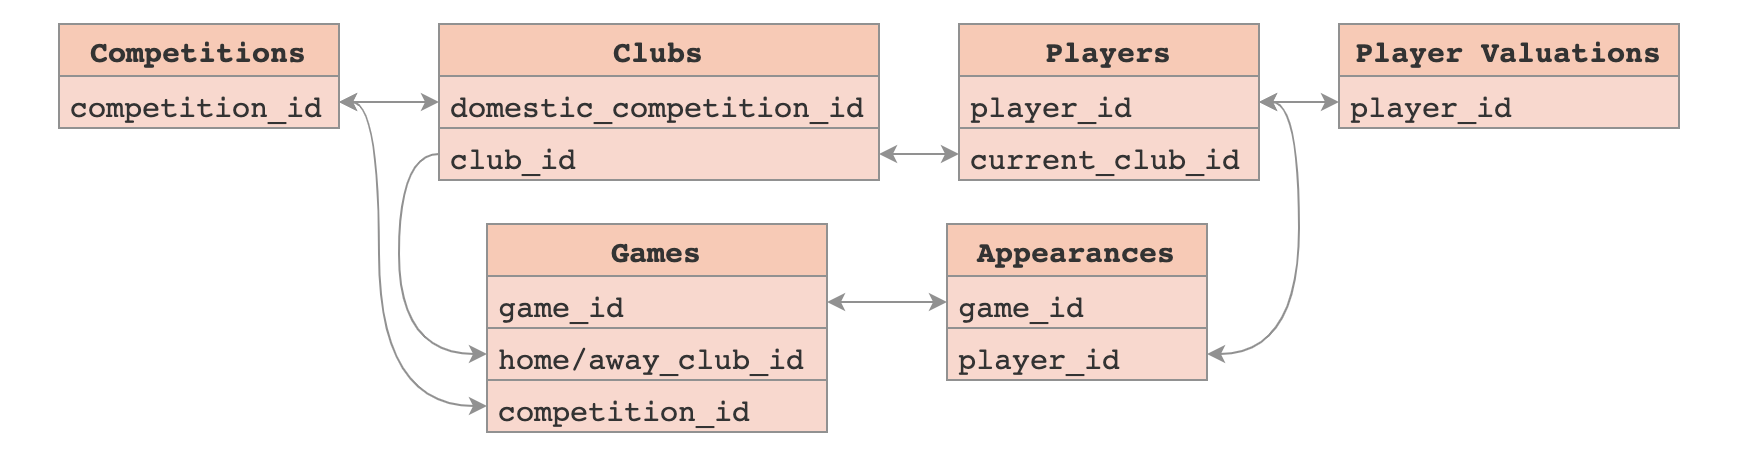

Now we look a the statistics of the data files to determine which fields are unique and to see if there are any null values present to decide what data cleaning steps to take.

In [63]:
!head -n 100000 appearances.csv | csvstat

  1. "appearance_id"

	Type of data:          Number
	Contains null values:  False
	Unique values:         99999
	Smallest value:        247859210
	Largest value:         3376150349917
	Sum:                   92469528578594800
	Mean:                  924704532831.276
	Median:                249446157565
	StDev:                 1047587041665.093
	Most common values:    248393752453 (1x)
	                       247992967064 (1x)
	                       248393767064 (1x)
	                       248458267064 (1x)
	                       248596567064 (1x)

  2. "game_id"

	Type of data:          Number
	Contains null values:  False
	Unique values:         4688
	Smallest value:        2457642
	Largest value:         3376150
	Sum:                   249035926248
	Mean:                  2490384.166
	Median:                2485971
	StDev:                 24975.577
	Most common values:    2458586 (33x)
	                       2479929 (28x)
	                       2484582 (28x)
	                  

In [64]:
!head -n 118001 club_games.csv | csvstat

  1. "club_id"

	Type of data:          Number
	Contains null values:  False
	Unique values:         2440
	Smallest value:        1
	Largest value:         102261
	Sum:                   524824615
	Mean:                  4447.666
	Median:                987
	StDev:                 10200.329
	Most common values:    131 (597x)
	                       418 (591x)
	                       368 (582x)
	                       13 (568x)
	                       506 (556x)

  2. "game_id"

	Type of data:          Number
	Contains null values:  False
	Unique values:         59000
	Smallest value:        2211607
	Largest value:         3963078
	Sum:                   344496940466
	Mean:                  2919465.597
	Median:                2875248.5
	StDev:                 484624.148
	Most common values:    2219794 (2x)
	                       2244388 (2x)
	                       2211607 (2x)
	                       2252846 (2x)
	                       2229332 (2x)

  3. "own_goals"

	Type of data:  

In [65]:
!head -n 411 clubs.csv | csvstat

  1. "club_id"

	Type of data:          Number
	Contains null values:  False
	Unique values:         410
	Smallest value:        3
	Largest value:         83678
	Sum:                   1936981
	Mean:                  4724.344
	Median:                1109
	StDev:                 10443.187
	Most common values:    1032 (1x)
	                       2323 (1x)
	                       1387 (1x)
	                       1071 (1x)
	                       2703 (1x)

  2. "name"

	Type of data:          Text
	Contains null values:  False
	Unique values:         410
	Longest value:         31 characters
	Most common values:    fc-reading (1x)
	                       orduspor (1x)
	                       acn-siena-1904 (1x)
	                       wigan-athletic (1x)
	                       spartak-vladikavkaz (1x)

  3. "pretty_name"

	Type of data:          Text
	Contains null values:  False
	Unique values:         410
	Longest value:         31 characters
	Most common values:    Fc Reading (1x)
	

In [66]:
!head -n 43 competitions.csv | csvstat

/home/ubuntu/.local/lib/python3.8/site-packages/agate/table/from_csv.py:74: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  1. "competition_id"

	Type of data:          Text
	Contains null values:  False
	Unique values:         42
	Longest value:         4 characters
	Most common values:    L1 (1x)
	                       DFB (1x)
	                       DFL (1x)
	                       NL1 (1x)
	                       NLP (1x)

  2. "pretty_name"

	Type of data:          Text
	Contains null values:  False
	Unique values:         41
	Longest value:         43 characters
	Most common values:    Premier Liga (2x)
	                       Bundesliga (1x)
	                       Dfb Pokal (1x)
	                       Dfl Supercup (1x)
	                       Eredivisie (1x)

  3. "type"

	Type of data:          Text
	Contains null values:  False
	Unique values:         4
	Longest value:         17 characters
	Most common values:    domestic_league (14x)
	        

In [67]:
!head -n 59001 games.csv | csvstat

/home/ubuntu/.local/lib/python3.8/site-packages/agate/table/from_csv.py:74: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  1. "game_id"

	Type of data:          Number
	Contains null values:  False
	Unique values:         59000
	Smallest value:        2211607
	Largest value:         3963078
	Sum:                   172248470233
	Mean:                  2919465.597
	Median:                2875248.5
	StDev:                 484626.202
	Most common values:    2219794 (1x)
	                       2244388 (1x)
	                       2211607 (1x)
	                       2252846 (1x)
	                       2229332 (1x)

  2. "competition_id"

	Type of data:          Text
	Contains null values:  False
	Unique values:         42
	Longest value:         4 characters
	Most common values:    IT1 (3950x)
	                       GB1 (3946x)
	                       ES1 (3940x)
	                       FR1 (3849x)
	                       TR1 (3373x)

  3. "competition_type"


In [68]:
!head -n 1000 player_valuations.csv | csvstat

  1. "date"

	Type of data:          Date
	Contains null values:  False
	Unique values:         603
	Smallest value:        2004-10-04
	Largest value:         2022-03-22
	Most common values:    2014-03-28 (19x)
	                       2013-06-24 (10x)
	                       2016-07-01 (9x)
	                       2004-10-04 (9x)
	                       2019-06-14 (9x)

  2. "datetime"

	Type of data:          Date
	Contains null values:  False
	Unique values:         603
	Smallest value:        2004-10-04
	Largest value:         2022-03-22
	Most common values:    2014-03-28 (19x)
	                       2013-06-24 (10x)
	                       2016-07-01 (9x)
	                       2004-10-04 (9x)
	                       2019-06-14 (9x)

  3. "dateweek"

	Type of data:          Date
	Contains null values:  False
	Unique values:         410
	Smallest value:        2004-10-04
	Largest value:         2022-03-21
	Most common values:    2014-03-24 (19x)
	                       2014-02-10 

In [69]:
!head -n 25623 players.csv | csvstat

/home/ubuntu/.local/lib/python3.8/site-packages/agate/table/from_csv.py:74: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  1. "player_id"

	Type of data:          Number
	Contains null values:  False
	Unique values:         25622
	Smallest value:        10
	Largest value:         1059630
	Sum:                   7217030945
	Mean:                  281673.208
	Median:                242652.5
	StDev:                 217554.268
	Most common values:    254016 (1x)
	                       51053 (1x)
	                       31451 (1x)
	                       44622 (1x)
	                       30802 (1x)

  2. "pretty_name"

	Type of data:          Text
	Contains null values:  False
	Unique values:         25131
	Longest value:         32 characters
	Most common values:    Paulinho (11x)
	                       Joao Pedro (8x)
	                       Guilherme (7x)
	                       Fabinho (5x)
	                       Danilo (5x)

  3. "club_id"

	Type of dat

Now we are going to remove the unnessary columns and only keep the ones that are needed

In [125]:
!csvcut -c 1,2,3,5,6,7,8,9,10,12,15,21 players.csv > players2.csv

In [126]:
!csvcut -c 1,4,5,6,7,8,9,10 games.csv > games2.csv

In [127]:
!csvcut -c 1,2,3,5,6 competitions.csv > competitions2.csv

In [128]:
!csvcut -c 1,3,5,8,10 clubs.csv > clubs2.csv

In [129]:
!csvcut -c 2,3,4,5,7,8,9,10,11,12 appearances.csv > appearances2.csv

<b>Following cleaning steps were taken to clean the data</b>

After we organized and merged the files into new versions, we filtered and cleaned the data deeper in Trifacta. Our steps and process for cleaning the data are as follows: <br> 
<br>

Firstly, our group focused on players, so we dropped out the files <b>Club_games</b> and <b>Player_valuations</b>. Then we deal with the rest of the files that we need. <br> 
<br>

• <b>Appearances</b> Since we have deleted the unnecessary columns, looking at the column detail of Date, we found that there are 829 missing data, because there are more than 1,000,000 player appearance records,so we removed those missing data, and the rest of the columns Game_id, Player_id, Player_club_id, Competition_id, Yellow_cards, Red_cards, Goals, Assists and Minutes_played have no missing values. <br><br>
• <b>Clubs</b> We found that the data of Name and Pretty_name in the original table have overlapping parts, so we removed the duplicate column of Name to make it more convenient for us to distinguish and process the data. Then, we checked that Club_id is unique. We went through the table details and found 276 and 29 missing data in Total_market_value and Average_age separately, so we replaced these with the number 0 and confirmed that there is no missing data in the other columns Club_id, Pretty_name, Foreigers_number, National_team_players. <br><br>
• <b>Games</b> We checked that all column data are intact, and there is no missing data. <br><br>
• <b>Competition</b> We checked that Competition_id is unique. We went through the table details and found 7 missing data in Country_name, so we replaced these with the number 0 and confirmed that there is no missing data in the other columns Competition_id, Pretty_name, Type and Country_id.<br><br>
• <b>Players</b> By looking at the columns’ detail, we found 11713 and 26 missing data in Country_of_citizenship, Country_of_birth individually, so we replaced them with Not provided. Besides, there are also 1891 and 972 missing data in Foot and Highest_market_value_in_gbp, and then we replaced them with 0. The rest of the columns are complete. <br><br>


Now we upload the cleaned data 

In [66]:
!wget https://footballdatafromtransfermarkt.s3.amazonaws.com/Appearances3.csv
!wget https://footballdatafromtransfermarkt.s3.amazonaws.com/clubs3.csv
!wget https://footballdatafromtransfermarkt.s3.amazonaws.com/competitions3.csv
!wget https://footballdatafromtransfermarkt.s3.amazonaws.com/games3.csv
!wget https://footballdatafromtransfermarkt.s3.amazonaws.com/players3.csv

--2022-12-10 01:24:15--  https://footballdatafromtransfermarkt.s3.amazonaws.com/Appearances3.csv
Resolving footballdatafromtransfermarkt.s3.amazonaws.com (footballdatafromtransfermarkt.s3.amazonaws.com)... 52.216.110.219, 52.216.136.51, 52.217.233.225, ...
Connecting to footballdatafromtransfermarkt.s3.amazonaws.com (footballdatafromtransfermarkt.s3.amazonaws.com)|52.216.110.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44930119 (43M) [text/csv]
Saving to: ‘Appearances3.csv’

Appearances3.csv    100%[===================>]  42.85M  49.7MB/s    in 0.9s    

2022-12-10 01:24:16 (49.7 MB/s) - ‘Appearances3.csv’ saved [44930119/44930119]

--2022-12-10 01:24:16--  https://footballdatafromtransfermarkt.s3.amazonaws.com/clubs3.csv
Resolving footballdatafromtransfermarkt.s3.amazonaws.com (footballdatafromtransfermarkt.s3.amazonaws.com)... 52.216.50.201, 52.216.17.232, 54.231.226.113, ...
Connecting to footballdatafromtransfermarkt.s3.amazonaws.com (footballdatafr

Upload and examine the final dataset by SQL

Final dataset:<br> <b>1,048,500</b> records and <b>10</b> attributes in Appearance; <br>
           <b>410</b> records and <b>5</b> attributes in Clubs;<br>
           <b>59,000</b> records and <b>8</b> attributes in Games;<br>
           <b>42</b> records and <b>5</b> attributes in Competition;<br>
           <b>25,622</b> records and <b>12</b> attributes in Players
           

In [76]:
!wc -l Appearances3.csv

1048500 Appearances3.csv


In [77]:
!wc -l clubs3.csv

410 clubs3.csv


In [79]:
!wc -l games3.csv

59000 games3.csv


In [78]:
!wc -l competitions3.csv

42 competitions3.csv


In [80]:
!wc -l players3.csv

25622 players3.csv


### Dimentional Modelling 
#### create database tables using PostgreSQL

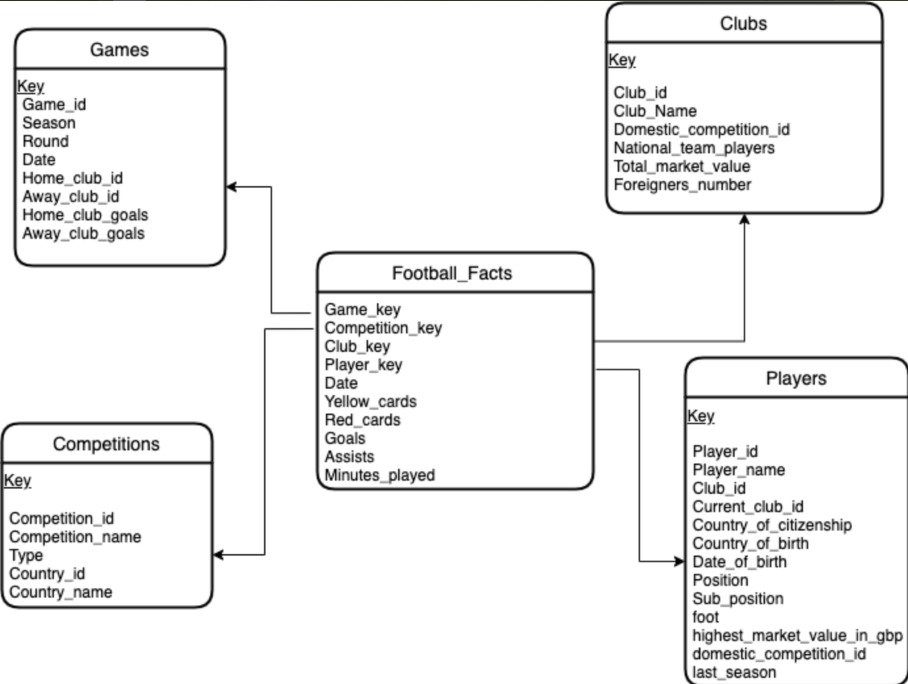

Connecting to the database

In [1]:
%load_ext sql

In [68]:
!dropdb -U student group_project_13

dropdb: error: database removal failed: ERROR:  database "group_project_13" is being accessed by other users
DETAIL:  There are 2 other sessions using the database.


In [69]:
!createdb -U student group_project_13

createdb: error: database creation failed: ERROR:  database "group_project_13" already exists


In [2]:
%sql postgresql://student@/group_project_13

Lets create the fact table and load the data to it

In [71]:
%%sql
DROP TABLE IF EXISTS foot_ball_facts;

CREATE TABLE foot_ball_facts (
    game_id INTEGER NOT NULL,
    player_id INTEGER NOT NULL,
    club_id INTEGER NOT NULL,
    date DATE,
    competition_id VARCHAR NOT NULL,
    yellow_cards NUMERIC (10),
    red_cards NUMERIC (10),
    goals NUMERIC (10),
    assists NUMERIC (10),
    minutes_played NUMERIC (10)
)

 * postgresql://student@/group_project_13
Done.
Done.


[]

In [72]:
%%sql
COPY foot_ball_facts FROM '/home/ubuntu/notebooks/Appearances3.csv'
CSV
HEADER;

 * postgresql://student@/group_project_13
1048500 rows affected.


[]

Let's create the club dimention table

In [73]:
%%sql
DROP TABLE IF EXISTS clubs;

CREATE TABLE clubs (
    key SERIAL PRIMARY KEY,
    club_id INTEGER NOT NULL,
    club_name VARCHAR NOT NULL,
    total_market_value NUMERIC,
    foreigners_number NUMERIC,
    national_team_players INTEGER
)

 * postgresql://student@/group_project_13
Done.
Done.


[]

In [74]:
%%sql
COPY clubs 
(club_id,club_name,total_market_value,foreigners_number,national_team_players)
FROM '/home/ubuntu/notebooks/clubs3.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

 * postgresql://student@/group_project_13
410 rows affected.


[]

In [75]:
%%sql
SELECT * FROM clubs
LIMIT 5

 * postgresql://student@/group_project_13
5 rows affected.


key,club_id,club_name,total_market_value,foreigners_number,national_team_players
1,1032,Fc Reading,33.66,12,6
2,2323,Orduspor,0,0,0
3,1387,Acn Siena 1904,4.32,6,2
4,1071,Wigan Athletic,12.38,14,6
5,2703,Spartak Vladikavkaz,0,0,0


In [76]:
%%sql
ALTER TABLE foot_ball_facts 
ADD COLUMN club_key INTEGER,
ADD CONSTRAINT fk_club_key
    FOREIGN KEY (club_key)
    REFERENCES clubs (key);

 * postgresql://student@/group_project_13
Done.


[]

In [77]:
%%sql
UPDATE foot_ball_facts
SET club_key = clubs.key
FROM clubs 
WHERE foot_ball_facts.club_id = clubs.club_id;

 * postgresql://student@/group_project_13
1043530 rows affected.


[]

In [78]:
%%sql
SELECT * FROM foot_ball_facts
ORDER BY game_id
LIMIT 5;

 * postgresql://student@/group_project_13
5 rows affected.


game_id,player_id,club_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,club_key
2457642,105811,1269,2014-08-03,NLSC,0,0,0,0,28,162
2457642,166959,1269,2014-08-03,NLSC,0,0,0,0,90,162
2457642,111185,610,2014-08-03,NLSC,0,0,0,0,90,361
2457642,182685,1269,2014-08-03,NLSC,0,0,0,0,22,162
2457642,143155,1269,2014-08-03,NLSC,0,0,0,0,90,162


In [79]:
%%sql
SELECT * FROM clubs
WHERE club_id = 610;

 * postgresql://student@/group_project_13
1 rows affected.


key,club_id,club_name,total_market_value,foreigners_number,national_team_players
361,610,Ajax Amsterdam,0,11,17


Let's create the games dimention table

In [80]:
%%sql
DROP TABLE IF EXISTS games;

CREATE TABLE games (
    key SERIAL PRIMARY KEY,
    game_id INTEGER NOT NULL,
    season INTEGER NOT NULL,
    round VARCHAR NOT NULL,
    date DATE,
    home_club_id INTEGER NOT NULL,
    away_club_id INTEGER NOT NULL,
    home_club_goals INTEGER NOT NULL,
    away_club_goals INTEGER NOT NULL
)

 * postgresql://student@/group_project_13
Done.
Done.


[]

In [81]:
%%sql
COPY games 
(game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals)
FROM '/home/ubuntu/notebooks/games3.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

 * postgresql://student@/group_project_13
59000 rows affected.


[]

In [82]:
%%sql
SELECT * FROM games
LIMIT 5

 * postgresql://student@/group_project_13
5 rows affected.


key,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals
1,2219794,2011,Final,2012-07-22,58,498,3,2
2,2244388,2012,final 1st leg,2012-08-22,131,418,3,2
3,2211607,2012,Final,2012-08-05,383,610,4,2
4,2252846,2012,Final,2012-08-11,720,2990,1,0
5,2229332,2012,Final,2012-08-12,27,16,2,1


In [83]:
%%sql
ALTER TABLE foot_ball_facts 
ADD COLUMN game_key INTEGER,
ADD CONSTRAINT fk_game_key
    FOREIGN KEY (game_key)
    REFERENCES games (key);

 * postgresql://student@/group_project_13
Done.


[]

In [84]:
%%sql
UPDATE foot_ball_facts
SET game_key = games.key
FROM games 
WHERE foot_ball_facts.game_id = games.game_id;

 * postgresql://student@/group_project_13
1048500 rows affected.


[]

In [85]:
%%sql
SELECT * FROM foot_ball_facts
ORDER BY competition_id
LIMIT 5;

 * postgresql://student@/group_project_13
5 rows affected.


game_id,player_id,club_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,club_key,game_key
2469866,86055,172,2014-07-25,BE1,0,0,0,0,90,341,13910
2469866,125754,172,2014-07-25,BE1,1,0,0,0,90,341,13910
2469866,77383,3057,2014-07-25,BE1,0,0,0,0,90,339,13910
2469866,18514,172,2014-07-25,BE1,0,0,0,0,14,341,13910
2469866,24877,3057,2014-07-25,BE1,0,0,0,0,90,339,13910


In [86]:
%%sql
SELECT * FROM games
WHERE game_id = 2479873;

 * postgresql://student@/group_project_13
1 rows affected.


key,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals
13906,2479873,2014,2. Matchday,2014-08-02,601,3057,2,3


Let's create the competitions dimention table

In [87]:
%%sql
DROP TABLE IF EXISTS competitions;

CREATE TABLE competitions (
    key SERIAL PRIMARY KEY,
    competition_id VARCHAR NOT NULL,
    competition_name VARCHAR,
    competition_type VARCHAR NOT NULL,
    country_id VARCHAR NOT NULL,
    country_name VARCHAR
)

 * postgresql://student@/group_project_13
Done.
Done.


[]

In [88]:
%%sql
COPY competitions 
(competition_id,competition_name,competition_type,country_id,country_name)
FROM '/home/ubuntu/notebooks/competitions3.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

 * postgresql://student@/group_project_13
42 rows affected.


[]

In [89]:
%%sql
SELECT * FROM competitions
LIMIT 5

 * postgresql://student@/group_project_13
5 rows affected.


key,competition_id,competition_name,competition_type,country_id,country_name
1,L1,Bundesliga,domestic_league,40,Germany
2,DFB,Dfb Pokal,domestic_cup,40,Germany
3,DFL,Dfl Supercup,other,40,Germany
4,NL1,Eredivisie,domestic_league,122,Netherlands
5,NLP,Toto Knvb Beker,domestic_cup,122,Netherlands


In [90]:
%%sql
ALTER TABLE foot_ball_facts 
ADD COLUMN competition_key INTEGER,
ADD CONSTRAINT fk_competition_key
    FOREIGN KEY (competition_key)
    REFERENCES competitions (key);

 * postgresql://student@/group_project_13
Done.


[]

In [91]:
%%sql
UPDATE foot_ball_facts
SET competition_key = competitions.key
FROM competitions 
WHERE foot_ball_facts.competition_id = competitions.competition_id;

 * postgresql://student@/group_project_13
1048500 rows affected.


[]

In [92]:
%%sql
SELECT * FROM foot_ball_facts
ORDER BY player_id
LIMIT 5;

 * postgresql://student@/group_project_13
5 rows affected.


game_id,player_id,club_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,club_key,game_key,competition_key
2551386,10,398,2015-05-20,CIT,0,0,0,0,82,212,14770,29
2532970,10,398,2015-04-08,CIT,0,0,0,0,90,212,14768,29
2528963,10,398,2015-01-27,CIT,0,0,0,0,90,212,14765,29
2532968,10,398,2015-03-04,CIT,1,0,1,0,82,212,14767,29
2478650,10,398,2014-10-19,IT1,0,0,0,0,1,212,15082,28


In [93]:
%%sql
SELECT * FROM competitions
WHERE competition_id = 'CIT';

 * postgresql://student@/group_project_13
1 rows affected.


key,competition_id,competition_name,competition_type,country_id,country_name
29,CIT,Italy Cup,domestic_cup,75,Italy


Let's create the players dimention table

In [94]:
%%sql
DROP TABLE IF EXISTS players;

CREATE TABLE players (
    key SERIAL PRIMARY KEY,
    player_id INTEGER NOT NULL,
    player_name VARCHAR,
    club_id VARCHAR NOT NULL, 
    current_club_id VARCHAR NOT NULL,
    country_of_citizenship VARCHAR,
    country_of_birth VARCHAR,
    date_of_birth date,
    position VARCHAR NOT NULL,
    sub_position VARCHAR,
    foot VARCHAR,
    highest_market_value_in_gbp NUMERIC,
    last_season INTEGER
) 

 * postgresql://student@/group_project_13
Done.
Done.


[]

In [95]:
%%sql
COPY players 
(player_id,player_name,club_id,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,foot,highest_market_value_in_gbp,last_season)
FROM '/home/ubuntu/notebooks/players3.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

 * postgresql://student@/group_project_13
25622 rows affected.


[]

In [96]:
%%sql
SELECT * FROM players
LIMIT 5

 * postgresql://student@/group_project_13
5 rows affected.


key,player_id,player_name,club_id,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,foot,highest_market_value_in_gbp,last_season
1,254016,Arthur Delalande,855,855,France,France,1992-05-18,Midfield,Central Midfield,Right,90000,2013
2,51053,Daniel Davari,23,23,Iran,Germany,1988-01-06,Goalkeeper,Not provided,Right,1130000,2013
3,31451,Torsten Oehrl,23,23,Germany,Germany,1986-01-07,Attack,Centre-Forward,Right,1130000,2013
4,44622,Vladimir Kisenkov,3691,3691,Russia,UdSSR,1981-10-08,Defender,Right-Back,Right,720000,2013
5,30802,Oscar Diaz,3302,3302,Spain,Spain,1984-04-24,Attack,Centre-Forward,Right,1080000,2013


In [97]:
%%sql
ALTER TABLE foot_ball_facts 
ADD COLUMN player_key INTEGER,
ADD CONSTRAINT fk_player_key
    FOREIGN KEY (player_key)
    REFERENCES players (key);

 * postgresql://student@/group_project_13
Done.


[]

In [98]:
%%sql
UPDATE foot_ball_facts
SET player_key = players.key
FROM players 
WHERE foot_ball_facts.player_id = players.player_id;

 * postgresql://student@/group_project_13
1046434 rows affected.


[]

In [99]:
%%sql
SELECT * FROM foot_ball_facts
ORDER BY game_id
LIMIT 5;

 * postgresql://student@/group_project_13
5 rows affected.


game_id,player_id,club_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,club_key,game_key,competition_key,player_key
2457642,30290,610,2014-08-03,NLSC,0,0,0,0,90,361,11324,6,14420
2457642,5017,610,2014-08-03,NLSC,1,0,0,0,90,361,11324,6,15885
2457642,7288,1269,2014-08-03,NLSC,0,0,0,0,90,162,11324,6,11158
2457642,4638,1269,2014-08-03,NLSC,0,0,0,0,90,162,11324,6,3601
2457642,34784,610,2014-08-03,NLSC,0,0,0,0,90,361,11324,6,24193


In [100]:
%%sql
SELECT * FROM players
WHERE player_id = 30290;

 * postgresql://student@/group_project_13
1 rows affected.


key,player_id,player_name,club_id,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,foot,highest_market_value_in_gbp,last_season
14420,30290,Kenneth Vermeer,234,234,Netherlands,Netherlands,1986-01-10,Goalkeeper,Not provided,Right,5850000,2019


Lets create a time dimention table

In [101]:
%%sql
SELECT DISTINCT date, 
    TO_CHAR(date, 'YYYY') AS year,
    TO_CHAR(date, 'MM') AS month,
    TO_CHAR(date, 'DD') AS day
FROM foot_ball_facts
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


date,year,month,day
2019-11-11,2019,11,11
2016-02-04,2016,02,04
2020-10-06,2020,10,06
2021-01-18,2021,01,18
2020-11-30,2020,11,30
2019-10-28,2019,10,28
2019-02-21,2019,02,21
2019-04-04,2019,04,04
2018-04-07,2018,04,07
2015-04-02,2015,04,02


In [102]:
%%sql
DROP TABLE IF EXISTS time;

CREATE TABLE time (
    key SERIAL PRIMARY KEY,
    date date,
    year CHAR (4),
    month CHAR (2),
    day CHAR (2)
);

 * postgresql://student@/group_project_13
Done.
Done.


[]

In [103]:
%%sql
INSERT INTO time (date,year, month, day)

SELECT DISTINCT date,
    TO_CHAR(date, 'YYYY') AS year,
    TO_CHAR(date, 'MM') AS month,
    TO_CHAR(date, 'DD') AS day
    
FROM foot_ball_facts;

 * postgresql://student@/group_project_13
2405 rows affected.


[]

In [104]:
%%sql

SELECT * FROM time
LIMIT 5;

 * postgresql://student@/group_project_13
5 rows affected.


key,date,year,month,day
1,2019-11-11,2019,11,11
2,2016-02-04,2016,02,04
3,2020-10-06,2020,10,06
4,2021-01-18,2021,01,18
5,2020-11-30,2020,11,30


In [105]:
%%sql
ALTER TABLE foot_ball_facts 
ADD COLUMN time_key INTEGER,
ADD CONSTRAINT fk_time_key
    FOREIGN KEY (time_key)
    REFERENCES time (key);

 * postgresql://student@/group_project_13
Done.


[]

In [106]:
%%sql
UPDATE foot_ball_facts
SET time_key = time.key
FROM time 
WHERE foot_ball_facts.date = time.date;

 * postgresql://student@/group_project_13
1048500 rows affected.


[]

In [107]:
%%sql
SELECT * FROM foot_ball_facts
LIMIT 5;

 * postgresql://student@/group_project_13
5 rows affected.


game_id,player_id,club_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,club_key,game_key,competition_key,player_key,time_key
2897484,17127,2722,2017-12-30,IT1,0,0,0,0,90,102,33343,28,13121,1135
2897206,17127,2722,2017-09-20,IT1,0,0,0,0,70,102,33413,28,13121,1299
2897395,17127,2722,2018-03-31,IT1,0,0,0,0,90,102,33167,28,13121,2104
2897228,17127,2722,2017-10-15,IT1,0,0,0,0,90,102,33388,28,13121,1118
2897544,17127,2722,2018-05-20,IT1,0,0,0,0,90,102,33084,28,13121,1635


In [108]:
%%sql
SELECT * FROM time
WHERE key = 2104;

 * postgresql://student@/group_project_13
1 rows affected.


key,date,year,month,day
2104,2018-03-31,2018,03,31


In [109]:
%%sql
ALTER TABLE foot_ball_facts
DROP COLUMN date,
DROP COLUMN game_id,
DROP COLUMN player_id,
DROP COLUMN club_id,
DROP COLUMN competition_id
;

 * postgresql://student@/group_project_13
Done.


[]

In [110]:
%%sql
SELECT * FROM foot_ball_facts
LIMIT 5;

 * postgresql://student@/group_project_13
5 rows affected.


yellow_cards,red_cards,goals,assists,minutes_played,club_key,game_key,competition_key,player_key,time_key
0,0,0,0,90,102,33343,28,13121,1135
0,0,0,0,70,102,33413,28,13121,1299
0,0,0,0,90,102,33167,28,13121,2104
0,0,0,0,90,102,33388,28,13121,1118
0,0,0,0,90,102,33084,28,13121,1635


## ASK 3 
### Data Analysis

### Question 1

#### Which players had the most goal contributions from the top 5 leagues for the season 2021? 



For this query we sum the total goals scored and total asssists to get the goal contribution (Scorer points) by each player for all games in the top 5 leagues.

Top 5 Leagues are Premier League in England, the Bundesliga in Germany, La Liga in Spain, Serie A in Italy, and Ligue 1 in France <br> 
##### Competition IDs <br> 
Premier League - GB1 <br>
Bundesliga - L1 <br>
La Liga - ES1 <br>
Serie A - IT1 <br>
Ligue 1 - FR1 <br>

We find the keys for the top five leagues or most popular leagues

In [3]:
%%sql
SELECT key,competition_id, competition_name 
FROM competitions
WHERE (competition_id = 'GB1' or
       competition_id = 'L1' or
       competition_id = 'ES1' or
       competition_id = 'IT1' or
       competition_id = 'FR1')

 * postgresql://student@/group_project_13
5 rows affected.


key,competition_id,competition_name
1,L1,Bundesliga
9,ES1,Laliga
15,FR1,Ligue 1
17,GB1,Premier League
28,IT1,Serie A


In [4]:
%%sql
SELECT player_key, p.player_name,p.country_of_citizenship,c.club_name, sum(goals) AS Total_Goals, sum(assists) AS Total_Assists, 
count(game_key) AS matches, sum(goals+assists) AS Scorer_points
FROM players p, clubs c, foot_ball_facts f, games g, competitions co

WHERE 

(p.key = f.player_key and
c.key = f.club_key and
g.key = f.game_key and
co.key = f.competition_key)

AND 

(g.season = 2021)

AND 

(co.key = 1 or
 co.key = 9 or
 co.key = 15 or
 co.key = 17 or
 co.key = 28
)

GROUP BY player_key, p.player_name,p.country_of_citizenship,c.club_name
ORDER BY Scorer_points DESC
LIMIT 10

 * postgresql://student@/group_project_13
10 rows affected.


player_key,player_name,country_of_citizenship,club_name,total_goals,total_assists,matches,scorer_points
21436,Kylian Mbappe,France,Fc Paris Saint Germain,28,19,35,47
22134,Robert Lewandowski,Poland,Fc Bayern Munchen,35,4,34,39
22267,Karim Benzema,France,Real Madrid,27,12,32,39
20331,Mohamed Salah,Egypt,Fc Liverpool,23,14,35,37
24890,Christopher Nkunku,France,Rasenballsport Leipzig,20,15,34,35
20430,Domenico Berardi,Italy,Us Sassuolo,15,17,33,32
20455,Heung Min Son,"Korea, South",Tottenham Hotspur,23,9,35,32
20379,Erling Haaland,Norway,Borussia Dortmund,22,8,24,30
20072,Ciro Immobile,Italy,Lazio Rom,27,3,31,30
22111,Wissam Ben Yedder,France,As Monaco,25,5,37,30


In [5]:
%%sql
SELECT p.player_name, sum(goals+assists) AS Scorer_points
FROM players p, clubs c, foot_ball_facts f, games g, competitions co

WHERE 

(p.key = f.player_key and
c.key = f.club_key and
g.key = f.game_key and
co.key = f.competition_key)

AND 

(g.season = 2021)

AND 

(co.key = 1 or
 co.key = 9 or
 co.key = 15 or
 co.key = 17 or
 co.key = 28
)

GROUP BY p.player_name
ORDER BY Scorer_points DESC
LIMIT 10

 * postgresql://student@/group_project_13
10 rows affected.


player_name,scorer_points
Kylian Mbappe,47
Robert Lewandowski,39
Karim Benzema,39
Mohamed Salah,37
Christopher Nkunku,35
Domenico Berardi,32
Heung Min Son,32
Erling Haaland,30
Ciro Immobile,30
Vinicius Junior,30


- We see that the combined top scorers and assisters are mostly from all the big teams such as PSG, Bayern, Real Madrid, Liverpool etc. We also see that 4 of the top 10 players in the 2021 calender year are French nationals. 


In [6]:
%matplotlib inline

<BarContainer object of 10 artists>

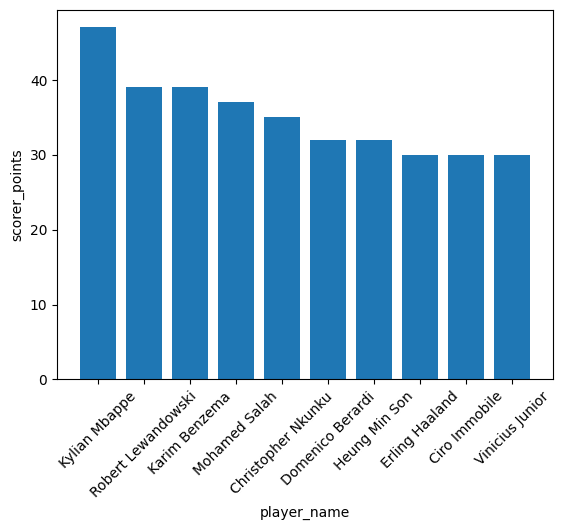

In [7]:
_.bar()

- We can see from the above query who were the players in the top five leagues who scored the most goals and assists. From the chart and tables we can see that it is a mix of players of different nationalities who are top scorers. From our findings we can conclude that these players are performing well and if a club is in the market looking for a top goalscorer in their team then they should look at these players from the following clubs. 

- Additionally, if we had player contract terms data in our files we could also reccomend to the teams which players can be lured from the other clubs whether that is offering a better pay package or if a player has a contract that is expiring then a club can negotiate with his agent and club for a transfer to them.

If we look at the output, we can see that Kylian Mbappe has scored 28 goals from 35 matches and Robert Lewandowski has scored 35 goals from 34 matches. Robert Lewandowski has scored higher number of goals from lower number of matches than Kylian Mbappe.

In [12]:
%%sql
SELECT p.player_name, sum(goals) AS Total_goals,count(game_key) AS matches, 
sum(minutes_played)/NULLIF(sum(goals),0) AS minutes_per_goal
FROM players p, clubs c, foot_ball_facts f, games g, competitions co

WHERE 

(p.key = f.player_key and
c.key = f.club_key and
g.key = f.game_key and
co.key = f.competition_key)

AND 

(g.season = 2021)

AND 

(co.key = 1 or
 co.key = 9 or
 co.key = 15 or
 co.key = 17 or
 co.key = 28
)

GROUP BY p.player_name
ORDER BY Total_goals DESC
LIMIT 10

 * postgresql://student@/group_project_13
10 rows affected.


player_name,total_goals,matches,minutes_per_goal
Robert Lewandowski,35,34,84.3428571428571429
Kylian Mbappe,28,35,108.2857142857142857
Karim Benzema,27,32,96.4074074074074074
Ciro Immobile,27,31,100.5925925925925926
Wissam Ben Yedder,25,37,101.7200000000000000
Du Scaron An Vlahović,24,36,122.5000000000000000
Patrik Schick,24,27,87.3333333333333333
Mohamed Salah,23,35,120.0869565217391304
Heung Min Son,23,35,131.3913043478260870
Erling Haaland,22,24,87.0454545454545455


<BarContainer object of 10 artists>

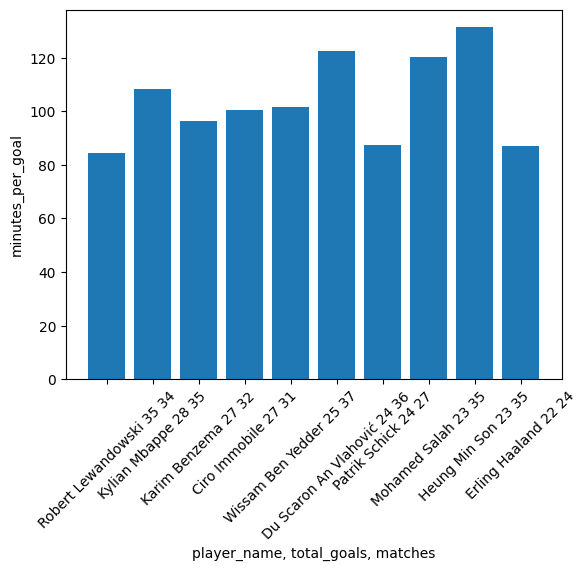

In [13]:
_.bar()

We dig deeper into the analysis of top three players and find for these players that how many goals they scored for each competition type, which is either the domestic league, domestic cup, international cup or other. 

In [14]:
%%sql

SELECT co.competition_type,sum(goals) AS Total_Goals, sum(assists) AS Total_Assists,count(game_key) AS matches,
sum(minutes_played) AS Total_minutes,sum(minutes_played)/NULLIF(sum(goals),0) AS minutes_per_goal
FROM players p, clubs c, foot_ball_facts f, games g, competitions co

WHERE 

(p.key = f.player_key and
c.key = f.club_key and
g.key = f.game_key and
co.key = f.competition_key)

AND 

(p.player_name = 'Robert Lewandowski')

AND 

(g.season = 2021)

AND

(co.competition_type = 'domestic_league' or
 co.competition_type = 'domestic_cup' or
 co.competition_type = 'international_cup' or
 co.competition_type = 'other'
)

GROUP BY co.competition_type

 * postgresql://student@/group_project_13
4 rows affected.


competition_type,total_goals,total_assists,matches,total_minutes,minutes_per_goal
domestic_cup,0,0,1,90,None
domestic_league,35,4,34,2952,84.3428571428571429
international_cup,13,3,10,876,67.3846153846153846
other,2,0,1,88,44.0000000000000000


In [15]:
%%sql

SELECT co.competition_type,sum(goals) AS Total_Goals, sum(assists) AS Total_Assists,count(game_key) AS matches,sum(minutes_played) AS Total_minutes,sum(minutes_played)/NULLIF(sum(goals),0) AS minutes_per_goal
FROM players p, clubs c, foot_ball_facts f, games g, competitions co

WHERE 

(p.key = f.player_key and
c.key = f.club_key and
g.key = f.game_key and
co.key = f.competition_key)

AND 

(p.player_name = 'Kylian Mbappe')

AND 

(g.season = 2021)

AND

(co.competition_type = 'domestic_league' or
 co.competition_type = 'domestic_cup' or
 co.competition_type = 'international_cup' or
 co.competition_type = 'other'
)

GROUP BY co.competition_type

 * postgresql://student@/group_project_13
2 rows affected.


competition_type,total_goals,total_assists,matches,total_minutes,minutes_per_goal
domestic_league,28,19,35,3032,108.2857142857142857
international_cup,6,6,8,674,112.3333333333333333


In [16]:
%%sql

SELECT co.competition_type,sum(goals) AS Total_Goals, sum(assists) AS Total_Assists,count(game_key) AS matches,sum(minutes_played) AS Total_minutes,sum(minutes_played)/NULLIF(sum(goals),0) AS minutes_per_goal
FROM players p, clubs c, foot_ball_facts f, games g, competitions co

WHERE 

(p.key = f.player_key and
c.key = f.club_key and
g.key = f.game_key and
co.key = f.competition_key)

AND 

(p.player_name = 'Karim Benzema')

AND 

(g.season = 2021)

AND

(co.competition_type = 'domestic_league' or
 co.competition_type = 'domestic_cup' or
 co.competition_type = 'international_cup' or
 co.competition_type = 'other'
)

GROUP BY co.competition_type

 * postgresql://student@/group_project_13
3 rows affected.


competition_type,total_goals,total_assists,matches,total_minutes,minutes_per_goal
domestic_league,27,12,32,2603,96.4074074074074074
international_cup,15,2,12,1106,73.7333333333333333
other,2,1,2,210,105.0000000000000000


The findings of these can help clubs in evaluating a player performance in all the different competition types and based on these stats a club can decide whether to increase a player’s salary on his performance, increase his transfer price or tie him down to a new long-term contract etc.

### Question 2

#### Which players are aggressive, that is collected, the most yellow and red cards for all the seasons in the data for the top 5 leagues?

In the below query we find the sum of the total red cards and yellow card by each player in their respective leagues and order it first by the amount of red cards as a red card is when a player has conducted a serious foul or a serious misconduct which results in the player being sent off and the team then has to continue playing the match with one less man.

In [32]:
%%sql
SELECT  
players.player_name, players.position,
sum(foot_ball_facts.red_cards) as total_red_cards, sum(foot_ball_facts.yellow_cards) as total_yellow_cards, competitions.competition_name
FROM foot_ball_facts
JOIN players on players.key = foot_ball_facts.player_key
JOIN competitions on competitions.key = foot_ball_facts.competition_key
JOIN games on games.key = foot_ball_facts.game_key
JOIN clubs on clubs.key = foot_ball_facts.club_key
WHERE 
competitions.competition_name = 'Ligue 1'
GROUP BY players.player_name, players.position,competitions.competition_name
ORDER BY sum(foot_ball_facts.red_cards) DESC, sum(foot_ball_facts.yellow_cards) DESC
LIMIT 10;


 * postgresql://student@/group_project_13
10 rows affected.


player_name,position,total_red_cards,total_yellow_cards,competition_name
Hilton,Defender,5,24,Ligue 1
Yannick Cahuzac,Midfield,4,56,Ligue 1
Alexander Djiku,Defender,4,51,Ligue 1
Damien Da Silva,Defender,4,40,Ligue 1
Mario Balotelli,Attack,4,28,Ligue 1
Fallou Diagne,Defender,4,19,Ligue 1
Nicolas Pallois,Defender,3,60,Ligue 1
Jordan Amavi,Defender,3,38,Ligue 1
Christophe Herelle,Defender,3,29,Ligue 1
Dimitri Payet,Attack,3,27,Ligue 1


<BarContainer object of 10 artists>

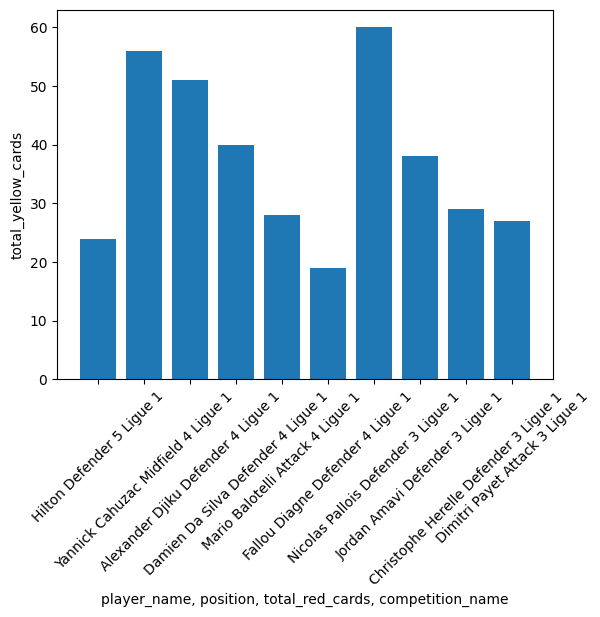

In [33]:
_.bar()

In [34]:
%%sql
SELECT  
players.player_name, players.position,
sum(foot_ball_facts.red_cards) as total_red_cards, sum(foot_ball_facts.yellow_cards) as total_yellow_cards, competitions.competition_name
FROM foot_ball_facts
JOIN players on players.key = foot_ball_facts.player_key
JOIN competitions on competitions.key = foot_ball_facts.competition_key
JOIN games on games.key = foot_ball_facts.game_key
WHERE 
competitions.competition_name = 'Premier League'
GROUP BY players.player_name, competitions.competition_name,players.position
ORDER BY sum(foot_ball_facts.red_cards) DESC, sum(foot_ball_facts.yellow_cards) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,position,total_red_cards,total_yellow_cards,competition_name
Granit Xhaka,Midfield,4,51,Premier League
David Luiz,Defender,4,19,Premier League
Fernandinho,Midfield,3,47,Premier League
Lewis Dunk,Defender,3,31,Premier League
Kyle Naughton,Defender,3,9,Premier League
Heung Min Son,Attack,3,6,Premier League
Mark Noble,Midfield,2,40,Premier League
James Ward Prowse,Midfield,2,33,Premier League
Ryan Bertrand,Defender,2,31,Premier League
Sadio Mane,Attack,2,31,Premier League


<BarContainer object of 10 artists>

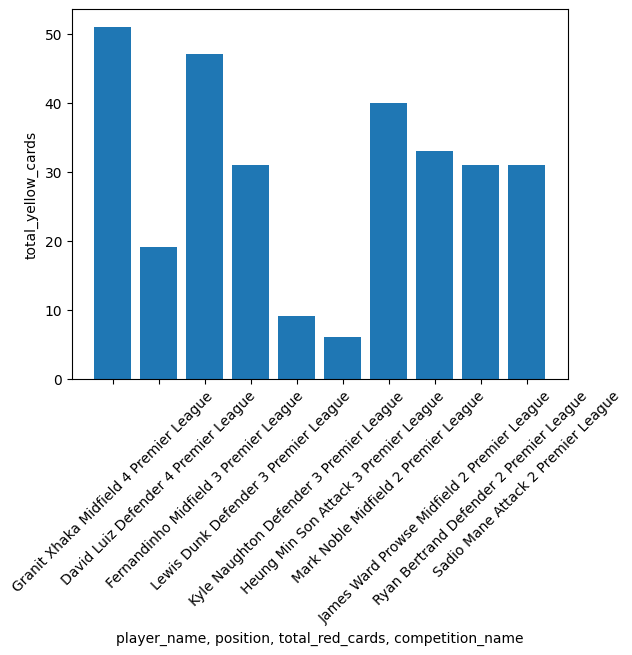

In [35]:
_.bar()

In [36]:
%%sql
SELECT  
players.player_name, players.position,
sum(foot_ball_facts.red_cards) as total_red_cards, sum(foot_ball_facts.yellow_cards) as total_yellow_cards, competitions.competition_name
FROM foot_ball_facts
JOIN players on players.key = foot_ball_facts.player_key
JOIN competitions on competitions.key = foot_ball_facts.competition_key
JOIN games on games.key = foot_ball_facts.game_key
WHERE 
competitions.competition_name = 'Laliga'
GROUP BY players.player_name, competitions.competition_name,players.position
ORDER BY sum(foot_ball_facts.red_cards) DESC, sum(foot_ball_facts.yellow_cards) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,position,total_red_cards,total_yellow_cards,competition_name
Allan Nyom,Defender,4,39,Laliga
Djene,Defender,3,46,Laliga
Rodrigo,Attack,3,19,Laliga
Ruben Blanco,Goalkeeper,3,12,Laliga
Damian Suarez,Defender,2,90,Laliga
Dani Parejo,Midfield,2,69,Laliga
Jaume Costa,Defender,2,60,Laliga
Fabian Orellana,Attack,2,54,Laliga
Ever Banega,Midfield,2,54,Laliga
Victor Ruiz,Defender,2,51,Laliga


<BarContainer object of 10 artists>

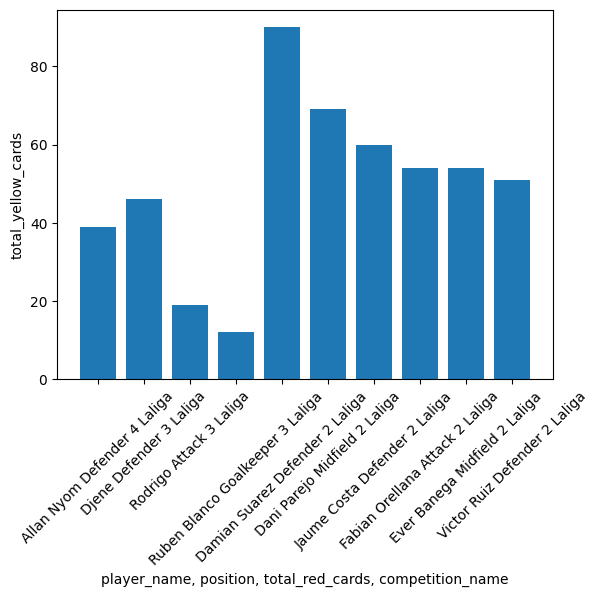

In [37]:
_.bar()

In [38]:
%%sql
SELECT  
players.player_name, players.position,
sum(foot_ball_facts.red_cards) as total_red_cards, sum(foot_ball_facts.yellow_cards) as total_yellow_cards, competitions.competition_name
FROM foot_ball_facts
JOIN players on players.key = foot_ball_facts.player_key
JOIN competitions on competitions.key = foot_ball_facts.competition_key
JOIN games on games.key = foot_ball_facts.game_key
WHERE 
competitions.competition_name = 'Serie A'
GROUP BY players.player_name, competitions.competition_name,players.position
ORDER BY sum(foot_ball_facts.red_cards) DESC, sum(foot_ball_facts.yellow_cards) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,position,total_red_cards,total_yellow_cards,competition_name
Domenico Berardi,Attack,5,61,Serie A
Kalidou Koulibaly,Defender,4,64,Serie A
Gabriel Paletta,Defender,4,20,Serie A
Roberto Soriano,Attack,3,39,Serie A
Rodrigo De Paul,Midfield,3,28,Serie A
Francesco Cassata,Midfield,3,25,Serie A
Fabrizio Cacciatore,Defender,3,24,Serie A
Adam Masina,Defender,3,22,Serie A
Diego Perotti,Attack,3,17,Serie A
Andrea Consigli,Goalkeeper,3,14,Serie A


<BarContainer object of 10 artists>

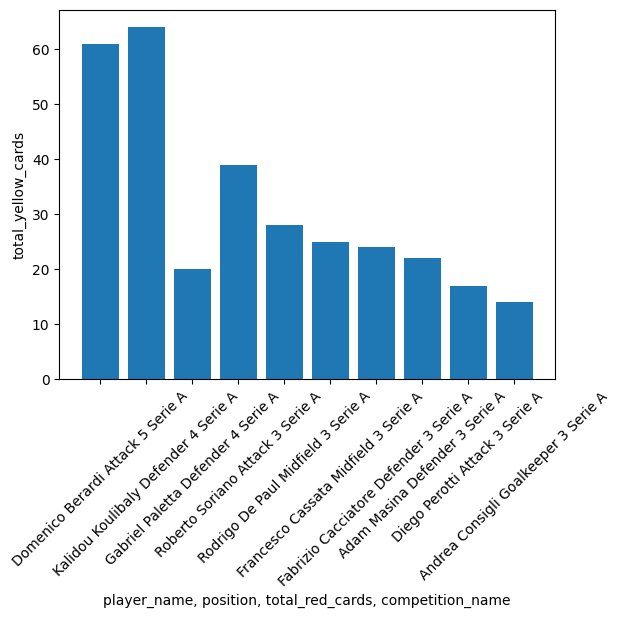

In [39]:
_.bar()

In [40]:
%%sql
SELECT  
players.player_name, players.position,
sum(foot_ball_facts.red_cards) as total_red_cards, sum(foot_ball_facts.yellow_cards) as total_yellow_cards, competitions.competition_name
FROM foot_ball_facts
JOIN players on players.key = foot_ball_facts.player_key
JOIN competitions on competitions.key = foot_ball_facts.competition_key
JOIN games on games.key = foot_ball_facts.game_key
WHERE 
competitions.competition_name = 'Bundesliga'
GROUP BY players.player_name, competitions.competition_name,players.position
ORDER BY sum(foot_ball_facts.red_cards) DESC, sum(foot_ball_facts.yellow_cards) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,position,total_red_cards,total_yellow_cards,competition_name
Vedad Ibisevic,Attack,3,28,Bundesliga
Giulio Donati,Defender,3,19,Bundesliga
Maximilian Arnold,Midfield,2,55,Bundesliga
Vladimir Darida,Midfield,2,37,Bundesliga
Jerome Boateng,Defender,2,24,Bundesliga
David Abraham,Defender,2,23,Bundesliga
Robert Andrich,Midfield,2,23,Bundesliga
Haris Seferovic,Attack,2,19,Bundesliga
Leon Bailey,Attack,2,13,Bundesliga
Dedryck Boyata,Defender,2,12,Bundesliga


<BarContainer object of 10 artists>

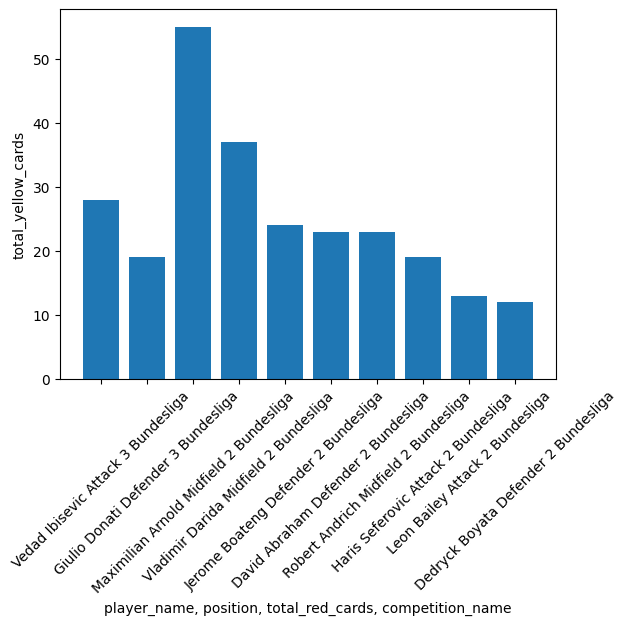

In [41]:
_.bar()

- We can see from the above queries that Premier League, Laliga, Ligue 1  and Serie A are very rough leagues as compared to Bundesliga where fewer players have gather red and yellow card comparatively. From the data we can also deduce that certain players are more aggressive than others as we can see the number of yellow cards collected over the last 8 seasons or so.

- Additionally we see very few goalkeepers in the list. This could be due to the fact that goalkeepers are allowed to touch the ball in thier box and usually it is either the defender or midfielders job to make an interception and commit a foul to stop the other team from scoring.

- To dive deeper into our analysis we would require data for all the players, the reason why they were awarded a red or yellow card in a match. It could either be because of the players aggressive nature/playing style, for a celeberation (yellow cards are awarded to player who remove their shirt while celeberating a goal), diving (an attempt by a player to gain an unfair advantage by falling to the ground and often pretending to be injured) or for a serious tackle/foul that resulted in the opposite team player sustain an injury or blocking a clear goal scoring opportunity.

In [42]:
%%sql
SELECT
competitions.competition_name,
sum(foot_ball_facts.red_cards) as total_red_cards

FROM foot_ball_facts

JOIN players on players.key = foot_ball_facts.player_key
JOIN competitions on competitions.key = foot_ball_facts.competition_key
JOIN games on games.key = foot_ball_facts.game_key
JOIN clubs on clubs.key = foot_ball_facts.club_key

WHERE 

(games.season = 2021 or
 games.season = 2020 or
 games.season = 2019 or
 games.season = 2018 or
 games.season = 2017 
)

GROUP BY competitions.competition_name
ORDER BY  total_red_cards DESC
LIMIT 10

 * postgresql://student@/group_project_13
10 rows affected.


competition_name,total_red_cards
Ligue 1,289
Liga Portugal Bwin,233
Super Lig,204
Serie A,202
Premier Liga,170
Laliga,169
Eredivisie,168
Jupiler Pro League,155
Premier League,130
Scottish Premiership,96


In [43]:
import pandas
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

In [44]:
engine = create_engine("postgresql://student@/group_project_13")

In [45]:
red_cards_piechart = pandas.read_sql("select competitions.competition_name, sum(foot_ball_facts.red_cards) as total_red_card FROM foot_ball_facts JOIN players on players.key = foot_ball_facts.player_key JOIN competitions on competitions.key = foot_ball_facts.competition_key JOIN games on games.key = foot_ball_facts.game_key JOIN clubs on clubs.key = foot_ball_facts.club_key WHERE (games.season = 2021 or games.season = 2020 or games.season = 2019 or games.season = 2018 or games.season = 2017) GROUP BY competitions.competition_name ORDER BY total_red_card DESC LIMIT 10",engine)

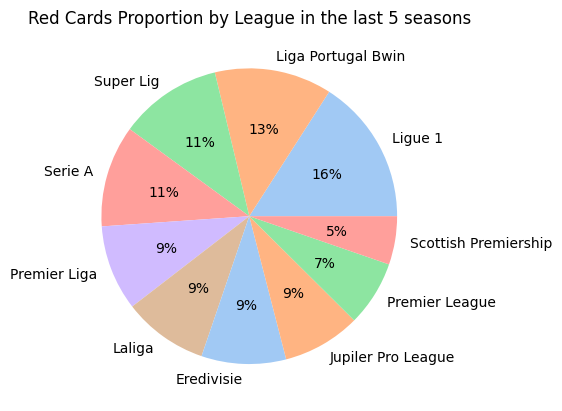

In [63]:
colors = sns.color_palette('pastel')[0:6]
plt.pie(red_cards_piechart.total_red_card, labels = red_cards_piechart.competition_name, colors = colors, autopct='%.0f%%')
plt.title("Red Cards Proportion by League in the last 5 seasons")
plt.show()

This is the proportion of total red cards by league. We can see that some leagues are more aggressive compared to the others. This could either be beacuse of the playing style or referee types.

- Based on the data, we can infer that Ligue 1 which is a French professional league has the most number of red cards i.e  289 over the last 5 seasons. A fair assumption could be made that, since Ligue 1 is considerably less watched than all the other big commercial leagues such as La liga and Premier League, the player’s insights on tackling the goals would be moderately not that strong. Apart from that, the coaching style would be considerably adequate as compared to other top leagues. 

- However, the assumptions are subjective because the red cards can be dependent on a variety of factors such as the individual player, Since we don’t have the adequate data to decide the reason on the red card or yellow card, we won’t be able to comment on the nature of red card. 

- The red cards in few cases can also bring down the market value of the player. For e.g., if any player has received numerous red cards in a season. In future, any club would be hesitant to sign him/her but this scenario is also subjective on a variety of factors. 

- The position of the player also has a correlation with red cards. We can infer that the defenders have a higher chance of getting a red card as they have to continuously stop the attacks from the other team. 

- Another fair assumption, and much rather a fact is that the clubs with more red cards will be at a disadvantage in a particular match as that player will be suspended.Hence,the scenario will be 10 players vs 11 players.

### Question 3

#### Who were the top 15 players that played the most minutes for the seasons 2017-2021?

In [17]:
%%sql
SELECT
players.player_name,clubs.club_name,games.season,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2017' 
GROUP BY
players.player_name, games.season, clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;


 * postgresql://student@/group_project_13
10 rows affected.


player_name,club_name,season,total_minutes_played_per_season
Thomas Strakosha,Lazio Rom,2017,4800
Saul Niguez,Atletico Madrid,2017,4753
Gianluigi Donnarumma,Ac Mailand,2017,4710
Clement Lenglet,Fc Sevilla,2017,4694
Luiz Gustavo,Olympique Marseille,2017,4625
Rui Patricio,Sporting Lissabon,2017,4620
Franck Kessie,Ac Mailand,2017,4513
Leonardo Bonucci,Ac Mailand,2017,4501
Lionel Messi,Fc Barcelona,2017,4468
Luis Suarez,Fc Barcelona,2017,4447


In [18]:
%%sql
SELECT
players.player_name,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2017' 
GROUP BY
players.player_name,clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,total_minutes_played_per_season
Thomas Strakosha,4800
Saul Niguez,4753
Gianluigi Donnarumma,4710
Clement Lenglet,4694
Luiz Gustavo,4625
Rui Patricio,4620
Franck Kessie,4513
Leonardo Bonucci,4501
Lionel Messi,4468
Luis Suarez,4447


<BarContainer object of 10 artists>

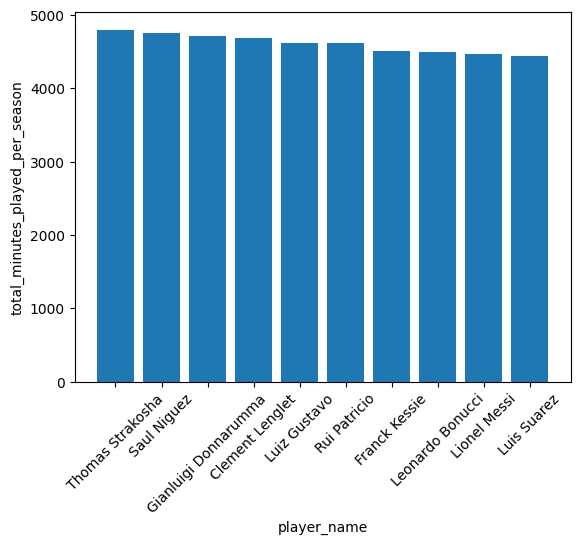

In [19]:
_.bar()

In [63]:
%%sql
SELECT
players.player_name,clubs.club_name,games.season,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2018' 
GROUP BY
players.player_name, games.season, clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,club_name,season,total_minutes_played_per_season
Daley Blind,Ajax Amsterdam,2018,4997
Dusan Tadić,Ajax Amsterdam,2018,4863
Kepa Arrizabalaga,Fc Chelsea,2018,4830
Andre Onana,Ajax Amsterdam,2018,4813
Matthijs De Ligt,Ajax Amsterdam,2018,4758
Dani Parejo,Fc Valencia,2018,4695
Gerard Pique,Fc Barcelona,2018,4680
Cesar Azpilicueta,Fc Chelsea,2018,4680
Alisson,Fc Liverpool,2018,4590
Danny Da Costa,Eintracht Frankfurt,2018,4560


In [20]:
%%sql
SELECT
players.player_name,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2018' 
GROUP BY
players.player_name,clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,total_minutes_played_per_season
Daley Blind,4997
Dusan Tadić,4863
Kepa Arrizabalaga,4830
Andre Onana,4813
Matthijs De Ligt,4758
Dani Parejo,4695
Gerard Pique,4680
Cesar Azpilicueta,4680
Alisson,4590
Danny Da Costa,4560


<BarContainer object of 10 artists>

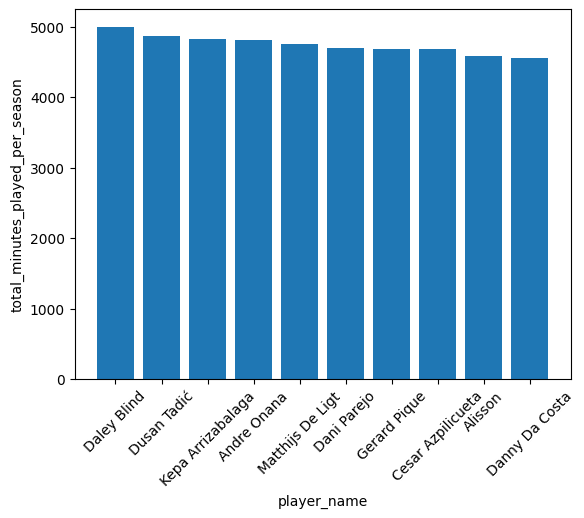

In [21]:
_.bar()

In [134]:
%%sql
SELECT
players.player_name,clubs.club_name,games.season,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2019' 
GROUP BY
players.player_name, games.season, clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,club_name,season,total_minutes_played_per_season
Conor Coady,Wolverhampton Wanderers,2019,4680
Virgil Van Dijk,Fc Liverpool,2019,4500
Rui Patricio,Wolverhampton Wanderers,2019,4500
Filip Kostić,Eintracht Frankfurt,2019,4390
Jan Oblak,Atletico Madrid,2019,4356
Lukas Hradecky,Bayer 04 Leverkusen,2019,4320
Joao Moutinho,Wolverhampton Wanderers,2019,4238
Manuel Neuer,Fc Bayern Munchen,2019,4230
Harry Maguire,Manchester United,2019,4208
Martin Hinteregger,Eintracht Frankfurt,2019,4169


In [22]:
%%sql
SELECT
players.player_name,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2019' 
GROUP BY
players.player_name,clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,total_minutes_played_per_season
Conor Coady,4680
Virgil Van Dijk,4500
Rui Patricio,4500
Filip Kostić,4390
Jan Oblak,4356
Lukas Hradecky,4320
Joao Moutinho,4238
Manuel Neuer,4230
Harry Maguire,4208
Martin Hinteregger,4169


<BarContainer object of 10 artists>

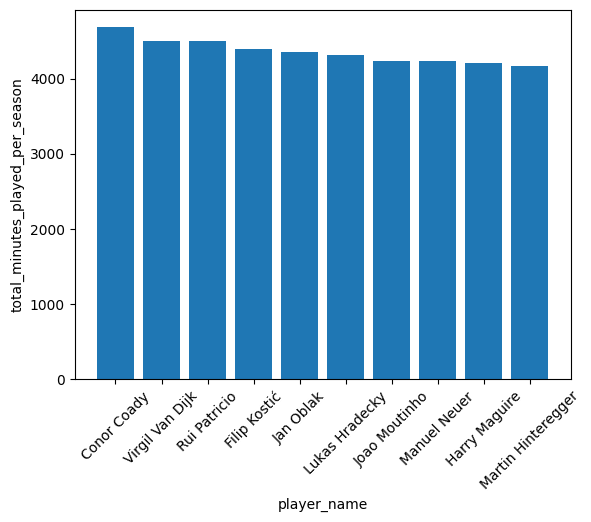

In [23]:
_.bar()

In [136]:
%%sql
SELECT
players.player_name,clubs.club_name,games.season,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2020' 
GROUP BY
players.player_name, games.season, clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,club_name,season,total_minutes_played_per_season
Bruno Fernandes,Manchester United,2020,4698
Thibaut Courtois,Real Madrid,2020,4680
Frenkie De Jong,Fc Barcelona,2020,4674
Aaron Wan Bissaka,Manchester United,2020,4646
Connor Goldson,Glasgow Rangers,2020,4620
Samir Handanovic,Inter Mailand,2020,4620
Harry Maguire,Manchester United,2020,4608
Manuel Neuer,Fc Bayern Munchen,2020,4560
Ederson,Manchester City,2020,4500
Jules Kounde,Fc Sevilla,2020,4482


In [24]:
%%sql
SELECT
players.player_name,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2020' 
GROUP BY
players.player_name,clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,total_minutes_played_per_season
Bruno Fernandes,4698
Thibaut Courtois,4680
Frenkie De Jong,4674
Aaron Wan Bissaka,4646
Connor Goldson,4620
Samir Handanovic,4620
Harry Maguire,4608
Manuel Neuer,4560
Ederson,4500
Jules Kounde,4482


<BarContainer object of 10 artists>

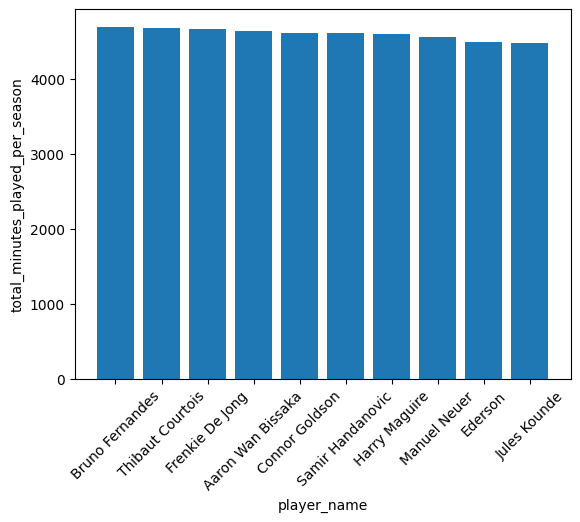

In [25]:
_.bar()

In [138]:
%%sql
SELECT
players.player_name,clubs.club_name,games.season,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2021' 
GROUP BY
players.player_name, games.season, clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,club_name,season,total_minutes_played_per_season
Connor Goldson,Glasgow Rangers,2021,4890
Thibaut Courtois,Real Madrid,2021,4770
James Tavernier,Glasgow Rangers,2021,4710
Jan Oblak,Atletico Madrid,2021,4590
Samir Handanovic,Inter Mailand,2021,4560
Antonio Rudiger,Fc Chelsea,2021,4506
Alisson,Fc Liverpool,2021,4500
Eder Militao,Real Madrid,2021,4496
Marc Andre Ter Stegen,Fc Barcelona,2021,4470
Peter Gulacsi,Rasenballsport Leipzig,2021,4437


In [26]:
%%sql
SELECT
players.player_name,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2021' 
GROUP BY
players.player_name,clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,total_minutes_played_per_season
Connor Goldson,4890
Thibaut Courtois,4770
James Tavernier,4710
Jan Oblak,4590
Samir Handanovic,4560
Antonio Rudiger,4506
Alisson,4500
Eder Militao,4496
Marc Andre Ter Stegen,4470
Peter Gulacsi,4437


<BarContainer object of 10 artists>

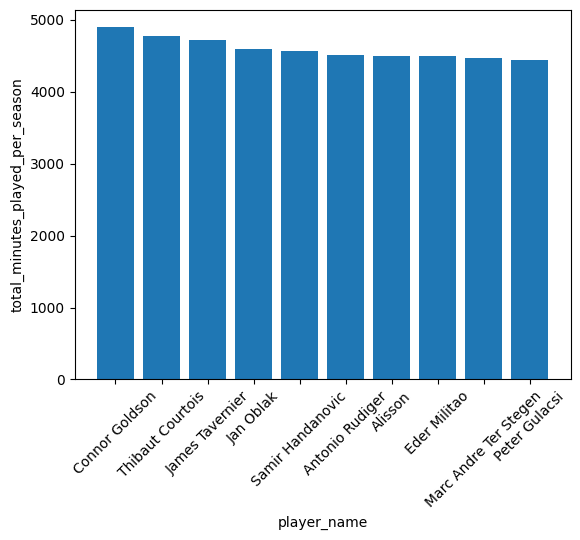

In [27]:
_.bar()

In [8]:
%%sql
SELECT
players.player_name,clubs.club_name,games.season,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2022' 
GROUP BY
players.player_name, games.season, clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,club_name,season,total_minutes_played_per_season
Alex Meret,Ssc Neapel,2022,1890
Giovanni Di Lorenzo,Ssc Neapel,2022,1869
Odysseas Vlachodimos,Benfica Lissabon,2022,1800
Min Jae Kim,Ssc Neapel,2022,1800
Milan Skriniar,Inter Mailand,2022,1727
Alejandro Grimaldo,Benfica Lissabon,2022,1697
Nicolo Barella,Inter Mailand,2022,1685
Fikayo Tomori,Ac Mailand,2022,1662
Lautaro Martinez,Inter Mailand,2022,1649
Hobie Verhulst,Az Alkmaar,2022,1620


In [28]:
%%sql
SELECT
players.player_name,sum(foot_ball_facts.minutes_played) AS total_minutes_played_per_season
FROM
foot_ball_facts 
JOIN players on players.key = foot_ball_facts.player_key 
JOIN clubs on clubs.key = foot_ball_facts.club_key 
JOIN games on games.key=foot_ball_facts.game_key
WHERE
games.season = '2022' 
GROUP BY
players.player_name,clubs.club_name
ORDER BY sum(foot_ball_facts.minutes_played) DESC
LIMIT 10;

 * postgresql://student@/group_project_13
10 rows affected.


player_name,total_minutes_played_per_season
Alex Meret,1890
Giovanni Di Lorenzo,1869
Odysseas Vlachodimos,1800
Min Jae Kim,1800
Milan Skriniar,1727
Alejandro Grimaldo,1697
Nicolo Barella,1685
Fikayo Tomori,1662
Lautaro Martinez,1649
Hobie Verhulst,1620


<BarContainer object of 10 artists>

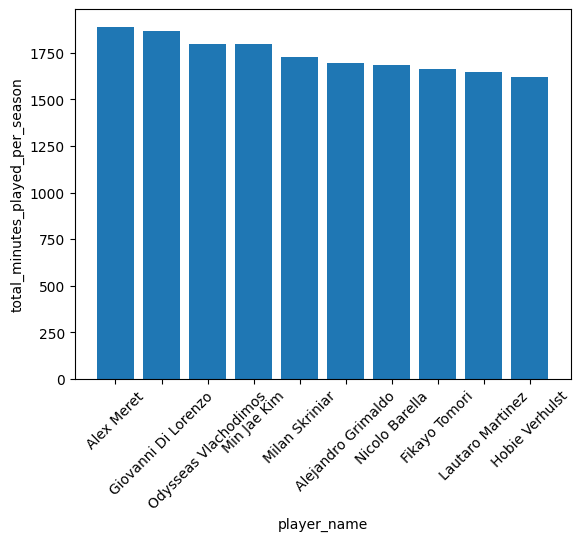

In [29]:
_.bar()

- In the above queries we see the players who played the most minutes by season from 2014 till the current season which is still underway. 
- From the data we can deduce that certain players played more becuase either they were injury free meaning they did not get injured for a long time and hence did not miss any matches. 
- Another reason could be the fact that the players were performing well and the manager repayed his faith by continuing to let the player play,week in week out. 
- However, to really confirm this claim we would need each players matchday ratings so we could better determine why a player played so many minutes. 
- This is because certain players in midfield not necessarily score as many goals but are rather judged by the number of interceptions and chances created for their teammates. 
- Hence, having more information for the players regarding each game would help to support the claim that why certain players played more minutes. 
- There could also be a claim that players in a certain position were injured for a particular team and hence the manager had no option but to start with a specific set of players which is why some players have so many minutes played compared to others. 
- Reiterating, we would need data about each clubs injury list for each season to better support this argument.